
=== [PART 1] Data Tables for Report ===


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8
Time (min),,,,,,,,
0,0.2801,0.3172,0.3726,0.2958,0.3962,0.3715,0.2983,0.3860
10,0.2530,0.2597,0.3516,0.3611,0.3663,0.3445,0.3569,0.3471
20,0.1874,0.2366,0.3043,0.3286,0.2780,0.2989,0.2984,0.2910
30,0.1637,0.2255,0.2888,0.2889,0.2682,0.2727,0.2794,0.2705
40,0.1533,0.2186,0.2608,0.2722,0.2529,0.2504,0.2674,0.2579
50,0.1529,0.2113,0.2474,0.2552,0.2489,0.2443,0.2419,0.2365
60,0.1321,0.2054,0.2399,0.2437,0.2471,0.2421,0.2377,0.2415
70,0.1366,,,0.2207,,,,
80,,,,,,,,


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8
Time (min),,,,,,,,
0,-0.0596,-0.0225,0.0329,-0.0439,0.0565,0.0318,-0.0415,0.0463
10,-0.0771,-0.0703,0.0216,0.0311,0.0363,0.0145,0.0269,0.0171
20,-0.0905,-0.0413,0.0264,0.0507,0.0001,0.0210,0.0205,0.0131
30,-0.0935,-0.0317,0.0315,0.0317,0.0110,0.0155,0.0222,0.0133
40,-0.0884,-0.0231,0.0191,0.0306,0.0112,0.0087,0.0257,0.0162
50,-0.0769,-0.0185,0.0176,0.0254,0.0191,0.0145,0.0121,0.0067
60,-0.0916,-0.0183,0.0162,0.0200,0.0234,0.0184,0.0141,0.0179
70,-0.0421,,,0.0421,,,,
80,,,,,,,,


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8
Time (min),,,,,,,,
0,0.2624,0.3146,0.4099,0.3116,0.3986,0.3640,0.3627,0.3744
10,0.2325,0.2748,0.3661,0.3741,0.3483,0.3313,0.3422,0.3660
20,0.2203,0.2449,0.3285,0.3251,0.2715,0.2862,0.2572,0.2766
30,0.1304,0.2256,0.2894,0.3001,0.2566,0.2566,0.2538,0.2513
40,0.1628,0.2176,0.2717,0.2870,0.2429,0.2415,0.2331,0.2359
50,0.1071,0.2096,0.2623,0.2647,0.2432,0.2315,0.2148,0.2277
60,0.1005,0.2124,0.2498,0.2454,0.2417,0.2301,0.2134,0.2311
70,0.1036,,0.2452,0.2202,,,,0.2278
80,,,,0.2301,,,,


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8
Time (min),,,,,,,,
0,-0.0873,-0.0352,0.0602,-0.0381,0.0488,0.0142,0.0129,0.0246
10,-0.0969,-0.0546,0.0366,0.0447,0.0189,0.0019,0.0128,0.0366
20,-0.0560,-0.0314,0.0522,0.0488,-0.0048,0.0099,-0.0191,0.0003
30,-0.1151,-0.0199,0.0439,0.0546,0.0111,0.0111,0.0083,0.0058
40,-0.0737,-0.0190,0.0351,0.0505,0.0064,0.0050,-0.0035,-0.0007
50,-0.1130,-0.0105,0.0422,0.0446,0.0231,0.0114,-0.0053,0.0076
60,-0.1151,-0.0031,0.0343,0.0299,0.0261,0.0145,-0.0021,0.0155
70,-0.0956,,0.0460,0.0210,,,,0.0286
80,,,,0.0000,,,,



=== [PART 2] Advanced Analysis Plots ===


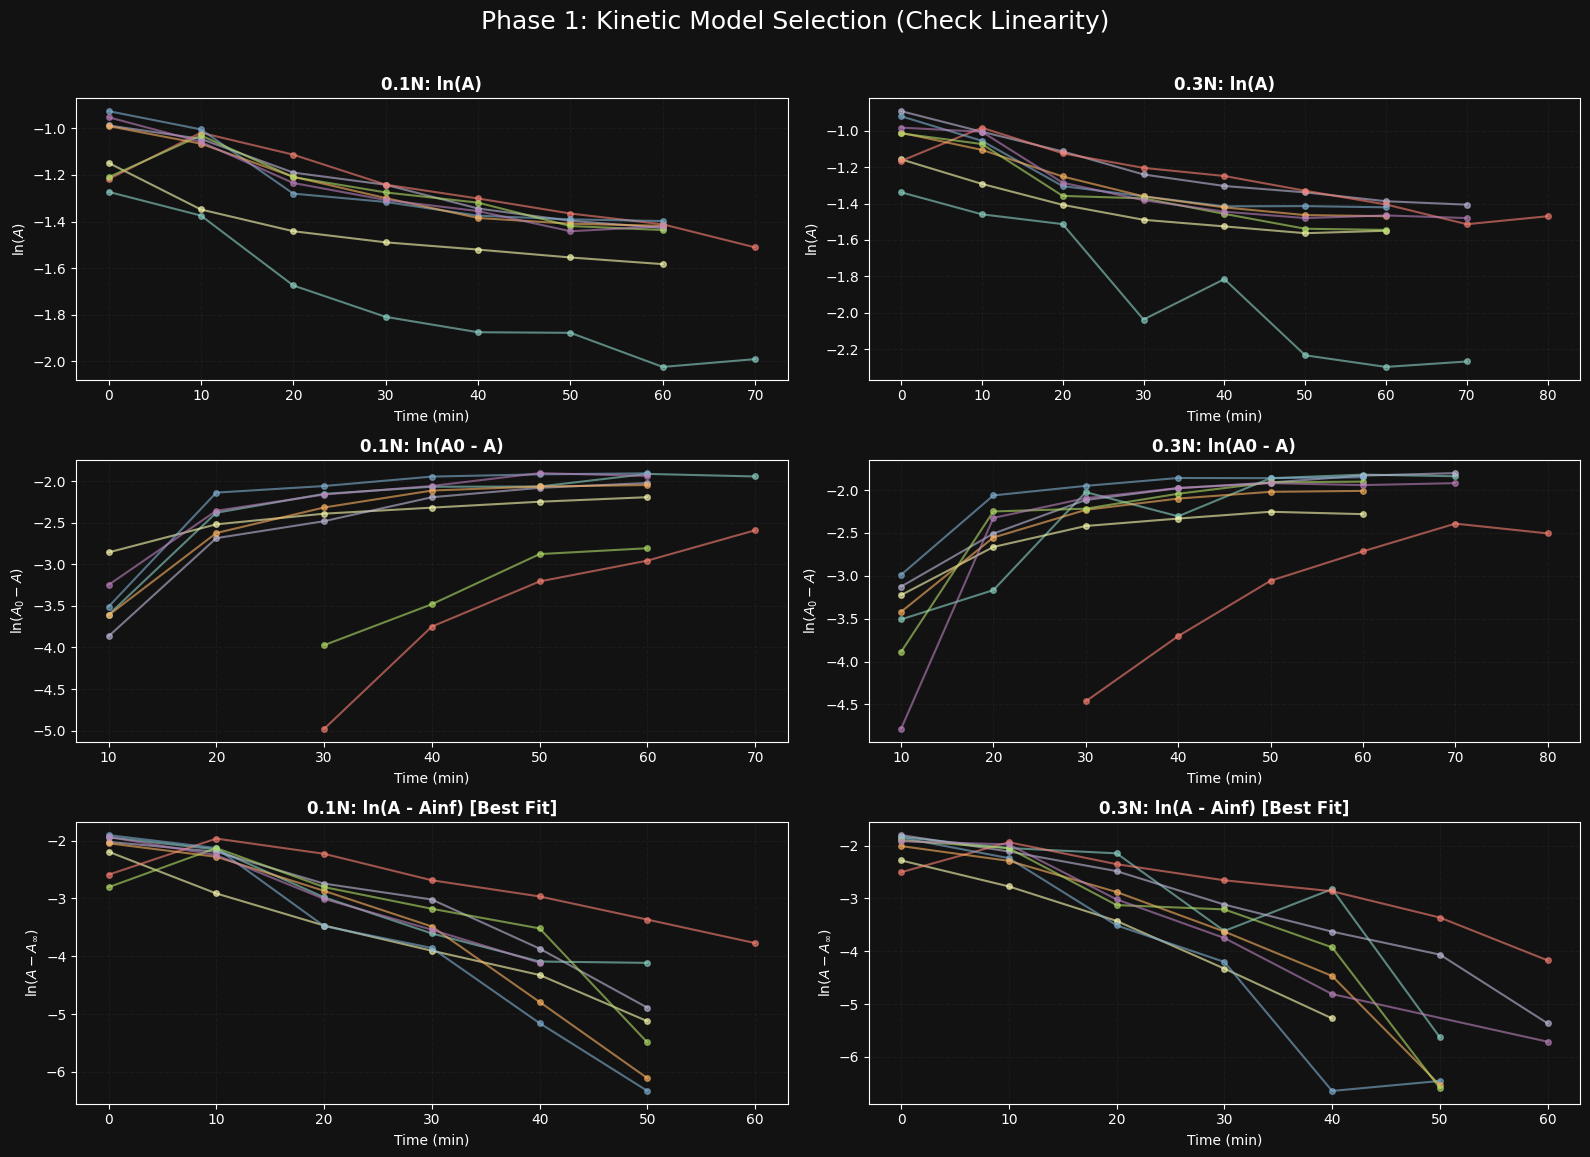

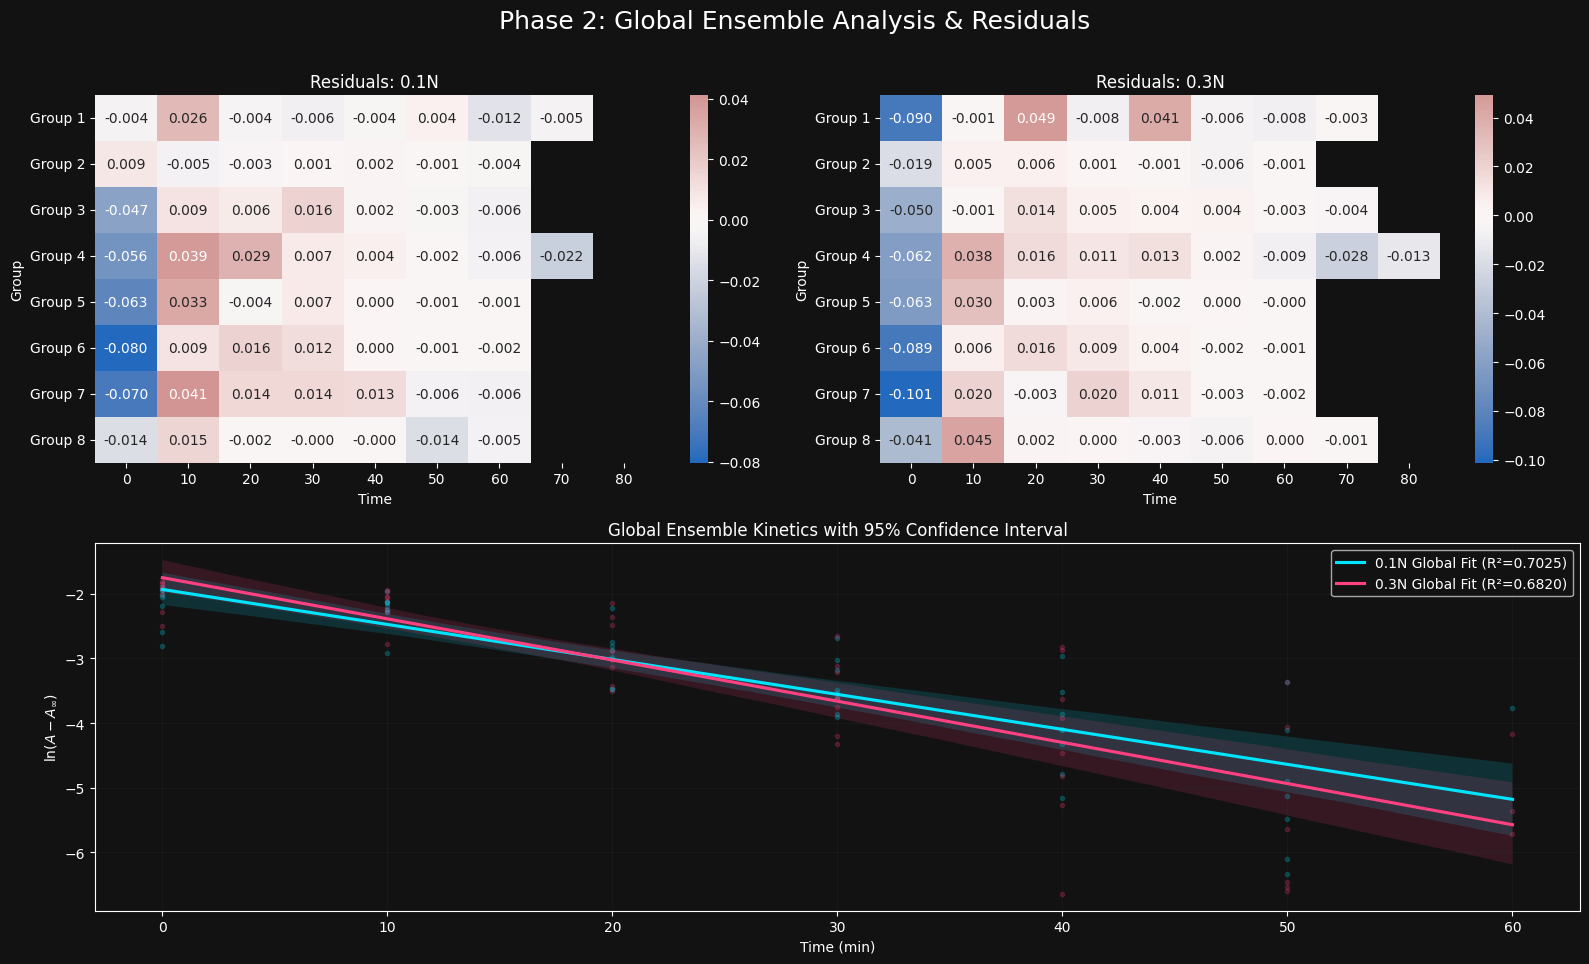


=== [PART 3] Calculated Constants ===


,Group,k_0.1N,k_0.3N,Order_n
0,Group 1,0.049468,0.065046,0.249196
1,Group 2,0.055262,0.075385,0.282648
2,Group 3,0.056161,0.056214,0.000850
3,Group 4,0.025337,0.029887,0.150349
4,Group 5,0.090324,0.105540,0.141713
5,Group 6,0.081390,0.085476,0.044587
6,Group 7,0.051374,0.083342,0.440380
7,Group 8,0.056476,0.069781,0.192548


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from pathlib import Path

OUTPUT_DIR = Path("/home/andy/physical_chem_exp/presentation")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
SAVE_DPI = 1000
plt.rcParams['savefig.dpi'] = SAVE_DPI

# ==========================================
# 1. 數據輸入區 (Corrected Data Kernel - Extended to 80 min)
# ==========================================
# 說明：已納入 Group 1, 3, 4, 8 的延長採樣數據 (70, 80 min)
# Time Points: 0 to 80 min

time_points = [0, 10, 20, 30, 40, 50, 60, 70, 80]

raw_data = {
    "Group 1": {
        # 0.1N: 到 70 min (0.13656)
        "0.1N": [0.28013, 0.25298, 0.18739, 0.16374, 0.15328, 0.15290, 0.13206, 0.13656, np.nan],
        # 0.3N: 到 70 min (0.10356)
        "0.3N": [0.26244, 0.23251, 0.22031, 0.13041, 0.16282, 0.10714, 0.10050, 0.10356, np.nan]
    },
    "Group 2": {
        # 只到 60 min
        "0.1N": [0.31723, 0.25969, 0.23655, 0.22552, 0.21860, 0.21131, 0.20536, np.nan, np.nan],
        "0.3N": [0.31459, 0.27485, 0.24492, 0.22561, 0.21757, 0.20958, 0.21244, np.nan, np.nan]
    },
    "Group 3": {
        # 0.1N: 到 60 min
        "0.1N": [0.37258, 0.35163, 0.30427, 0.28878, 0.26078, 0.24739, 0.23987, np.nan, np.nan],
        # 0.3N: 到 70 min (0.24516)
        "0.3N": [0.40994, 0.36607, 0.32850, 0.28943, 0.27166, 0.26233, 0.24983, 0.24516, np.nan]
    },
    "Group 4": {
        # 0.1N: 到 70 min (0.22068)
        "0.1N": [0.29580, 0.36113, 0.32862, 0.28893, 0.27225, 0.25523, 0.24368, 0.22068, np.nan],
        # 0.3N: 到 80 min (0.23005) - 勤勞組別！
        "0.3N": [0.31165, 0.37414, 0.32512, 0.30013, 0.28702, 0.26467, 0.24544, 0.22020, 0.23005]
    },
    "Group 5": {
        # 到 60 min
        "0.1N": [0.39620, 0.36629, 0.27799, 0.26824, 0.25286, 0.24889, 0.24711, np.nan, np.nan],
        "0.3N": [0.39863, 0.34828, 0.27152, 0.25659, 0.24295, 0.24322, 0.24165, np.nan, np.nan]
    },
    "Group 6": {
        # 到 60 min
        "0.1N": [0.37154, 0.34453, 0.29889, 0.27272, 0.25037, 0.24429, 0.24207, np.nan, np.nan],
        "0.3N": [0.36401, 0.33132, 0.28623, 0.25663, 0.24152, 0.23152, 0.23007, np.nan, np.nan]
    },
    "Group 7": {
        # 到 60 min
        "0.1N": [0.29825, 0.35692, 0.29843, 0.27942, 0.26742, 0.24187, 0.23775, np.nan, np.nan],
        "0.3N": [0.36266, 0.34218, 0.25725, 0.25381, 0.23310, 0.21478, 0.21341, np.nan, np.nan]
    },
    "Group 8": {
        # 0.1N: 到 60 min
        "0.1N": [0.38599, 0.34710, 0.29099, 0.27052, 0.25791, 0.23653, 0.24154, np.nan, np.nan],
        # 0.3N: 到 70 min (0.22776)
        "0.3N": [0.37437, 0.36602, 0.27660, 0.25126, 0.23589, 0.22772, 0.23106, 0.22776, np.nan]
    }
}

groups = list(raw_data.keys())

# ==========================================
# 2. 數據表格生成 (Raw Data & Deviations)
# ==========================================
# 轉換為 DataFrame
df_01 = pd.DataFrame({g: raw_data[g]["0.1N"] for g in groups}, index=time_points)
df_03 = pd.DataFrame({g: raw_data[g]["0.3N"] for g in groups}, index=time_points)
df_01.index.name = 'Time (min)'
df_03.index.name = 'Time (min)'

# 計算偏差 (Deviation from Class Mean)
dev_01 = df_01.sub(df_01.mean(axis=1), axis=0)
dev_03 = df_03.sub(df_03.mean(axis=1), axis=0)

# 表格樣式函數
def style_table(df, caption, cmap, vmin=None, vmax=None):
    return df.style.background_gradient(cmap=cmap, axis=None, vmin=vmin, vmax=vmax)\
             .format("{:.4f}", na_rep="")\
             .set_caption(caption)\
             .set_table_styles([
                 {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white'), ('font-family', 'Arial')]},
                 {'selector': 'td', 'props': [('font-family', 'Consolas'), ('text-align', 'center'), ('border', '1px solid #ddd')]},
                 {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '14px'), ('font-weight', 'bold')]}
             ])

# 顯示表格
print("\n=== [PART 1] Data Tables for Report ===")
display(style_table(df_01, "Table 1: 0.1 N HNO3 Raw Absorbance", 'Greens'))
display(style_table(dev_01, "Table 2: 0.1 N Deviations (Red=High, Blue=Low)", 'vlag', -0.05, 0.05))
display(style_table(df_03, "Table 3: 0.3 N HNO3 Raw Absorbance", 'Greens'))
display(style_table(dev_03, "Table 4: 0.3 N Deviations (Red=High, Blue=Low)", 'vlag', -0.05, 0.05))


# ==========================================
# 3. 進階分析圖表 (Phase 1 & Phase 2)
# ==========================================
print("\n=== [PART 2] Advanced Analysis Plots ===")

# 設定風格
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#121212'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['grid.color'] = '#333333'
plt.rcParams['font.family'] = 'DejaVu Sans'

# --- PHASE 1: 模型篩選 (Model Validation) ---
fig1, axes = plt.subplots(3, 2, figsize=(16, 12))
fig1.suptitle('Phase 1: Kinetic Model Selection (Check Linearity)', fontsize=18, color='white', y=0.96)

def plot_model(ax, conc_key, transform, ylabel, title=None):
    for g in groups:
        a = np.array(raw_data[g][conc_key])
        if np.isnan(a).all(): continue
        
        # Transform data
        y = transform(a)
        
        # 只畫有效點
        mask = ~np.isnan(y)
        if np.sum(mask) > 1:
            ax.plot(np.array(time_points)[mask], y[mask], 'o-', alpha=0.6, markersize=4, label=g)
            
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.3)
    if title: ax.set_title(title, fontsize=12, fontweight='bold', color='white')

# 定義轉換函數
def trans_lnA(a): return np.log(a, out=np.full_like(a, np.nan), where=(a>0))
def trans_lnA0_A(a): 
    diff = a[0] - a
    return np.log(diff, out=np.full_like(diff, np.nan), where=(diff>0))
def trans_lnA_Ainf(a):
    # 自動尋找最後一個有效點當作 A_inf
    valid_a = a[~np.isnan(a)]
    if len(valid_a) == 0: return np.full_like(a, np.nan)
    a_inf = valid_a[-1] # 取該組的最後一點
    
    diff = a - a_inf
    # 只取前面 (不含最後一點) 且大於0的點
    # 注意：這裡邏輯是取最後一點當無限大，所以最後一點 diff=0，log會變 -inf
    res = np.log(diff, out=np.full_like(diff, np.nan), where=(diff>0))
    return res

plot_model(axes[0,0], "0.1N", trans_lnA, r'$\ln(A)$', '0.1N: ln(A)')
plot_model(axes[0,1], "0.3N", trans_lnA, r'$\ln(A)$', '0.3N: ln(A)')
plot_model(axes[1,0], "0.1N", trans_lnA0_A, r'$\ln(A_0 - A)$', '0.1N: ln(A0 - A)')
plot_model(axes[1,1], "0.3N", trans_lnA0_A, r'$\ln(A_0 - A)$', '0.3N: ln(A0 - A)')
plot_model(axes[2,0], "0.1N", trans_lnA_Ainf, r'$\ln(A - A_{\infty})$', '0.1N: ln(A - Ainf) [Best Fit]')
plot_model(axes[2,1], "0.3N", trans_lnA_Ainf, r'$\ln(A - A_{\infty})$', '0.3N: ln(A - Ainf) [Best Fit]')

for ax in axes.flat: ax.set_xlabel('Time (min)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig1.savefig(OUTPUT_DIR / "exp6_phase1_model_selection.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# --- PHASE 2: 全域擬合與誤差分析 (Global Fit & Residuals) ---
results_list = []
residuals_data = []

def analyze_kinetics(t, a):
    a = np.array(a)
    if np.isnan(a).all(): return np.nan, np.full(len(t), np.nan)
    
    valid_mask = ~np.isnan(a)
    valid_a = a[valid_mask]
    valid_t = np.array(t)[valid_mask]
    
    if len(valid_a) < 3: return np.nan, np.full(len(t), np.nan)
    
    a_inf = valid_a[-1]
    diff = valid_a[:-1] - a_inf # 排除最後一點
    
    calc_mask = diff > 0
    if np.sum(calc_mask) < 2: return np.nan, np.full(len(t), np.nan)
    
    vt = valid_t[:-1][calc_mask]
    vy = np.log(diff[calc_mask])
    
    slope, intercept, _, _, _ = stats.linregress(vt, vy)
    
    # 計算殘差 (對應所有時間點)
    pred_A = np.full(len(t), np.nan)
    for i, time_val in enumerate(t):
        if not np.isnan(a[i]):
             # A_pred = A_inf + exp(-kt + C)
             pred_A[i] = a_inf + np.exp(slope * time_val + intercept)
             
    res = a - pred_A
    return -slope, res

for g in groups:
    k01, res01 = analyze_kinetics(time_points, raw_data[g]["0.1N"])
    k03, res03 = analyze_kinetics(time_points, raw_data[g]["0.3N"])
    n_order = np.nan
    if k01 > 0 and k03 > 0: n_order = np.log(k03/k01)/np.log(3)
    
    results_list.append({'Group': g, 'k_0.1N': k01, 'k_0.3N': k03, 'Order_n': n_order})
    for i, t in enumerate(time_points):
        residuals_data.append({'Group': g, 'Time': t, 'Res_01': res01[i], 'Res_03': res03[i]})

res_df = pd.DataFrame(results_list)
res_heatmap = pd.DataFrame(residuals_data)

fig2 = plt.figure(figsize=(16, 10))
fig2.suptitle('Phase 2: Global Ensemble Analysis & Residuals', fontsize=18, color='white', y=0.96)

# Residual Heatmaps
ax1 = fig2.add_subplot(2, 2, 1)
sns.heatmap(res_heatmap.pivot(index='Group', columns='Time', values='Res_01'), cmap='vlag', center=0, annot=True, fmt=".3f", ax=ax1)
ax1.set_title('Residuals: 0.1N', color='white')

ax2 = fig2.add_subplot(2, 2, 2)
sns.heatmap(res_heatmap.pivot(index='Group', columns='Time', values='Res_03'), cmap='vlag', center=0, annot=True, fmt=".3f", ax=ax2)
ax2.set_title('Residuals: 0.3N', color='white')

# Global Fit
ax3 = fig2.add_subplot(2, 1, 2)
all_t01, all_y01 = [], []
all_t03, all_y03 = [], []

for g in groups:
    for conc, col_t, col_y, color in [("0.1N", all_t01, all_y01, '#00E5FF'), ("0.3N", all_t03, all_y03, '#FF4081')]:
        a = np.array(raw_data[g][conc])
        # 邏輯同 analyze_kinetics
        valid_mask = ~np.isnan(a)
        if np.sum(valid_mask) >= 3:
            valid_a = a[valid_mask]
            valid_t = np.array(time_points)[valid_mask]
            a_inf = valid_a[-1]
            diff = valid_a[:-1] - a_inf
            mask = diff > 0
            if np.sum(mask) >= 2:
                vt, vy = valid_t[:-1][mask], np.log(diff[mask])
                col_t.extend(vt); col_y.extend(vy)
                ax3.plot(vt, vy, '.', color=color, alpha=0.2)

# 計算 R² 值
if len(all_t01) > 0:
    slope_01, intercept_01, r_01, _, _ = stats.linregress(np.array(all_t01), np.array(all_y01))
    r2_01 = r_01**2
    sns.regplot(x=np.array(all_t01), y=np.array(all_y01), ax=ax3, scatter=False, color='#00E5FF', 
                label=f'0.1N Global Fit (R²={r2_01:.4f})', ci=95)
if len(all_t03) > 0:
    slope_03, intercept_03, r_03, _, _ = stats.linregress(np.array(all_t03), np.array(all_y03))
    r2_03 = r_03**2
    sns.regplot(x=np.array(all_t03), y=np.array(all_y03), ax=ax3, scatter=False, color='#FF4081', 
                label=f'0.3N Global Fit (R²={r2_03:.4f})', ci=95)

ax3.set_title('Global Ensemble Kinetics with 95% Confidence Interval', color='white')
ax3.set_ylabel(r'$\ln(A - A_{\infty})$')
ax3.set_xlabel('Time (min)')
ax3.legend()
ax3.grid(True, alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig2.savefig(OUTPUT_DIR / "exp6_phase2_global_fit.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# 顯示最終計算結果
print("\n=== [PART 3] Calculated Constants ===")
display(res_df.style.background_gradient(cmap='Blues'))


=== [PART 4] Advanced Computational Chemistry Analysis ===

Data pool size: 0.1N = 48 points, 0.3N = 49 points
Valid bootstrap samples: 2000/2000
Reaction order n: 0.146 (95% CI: [-0.153, 0.451])


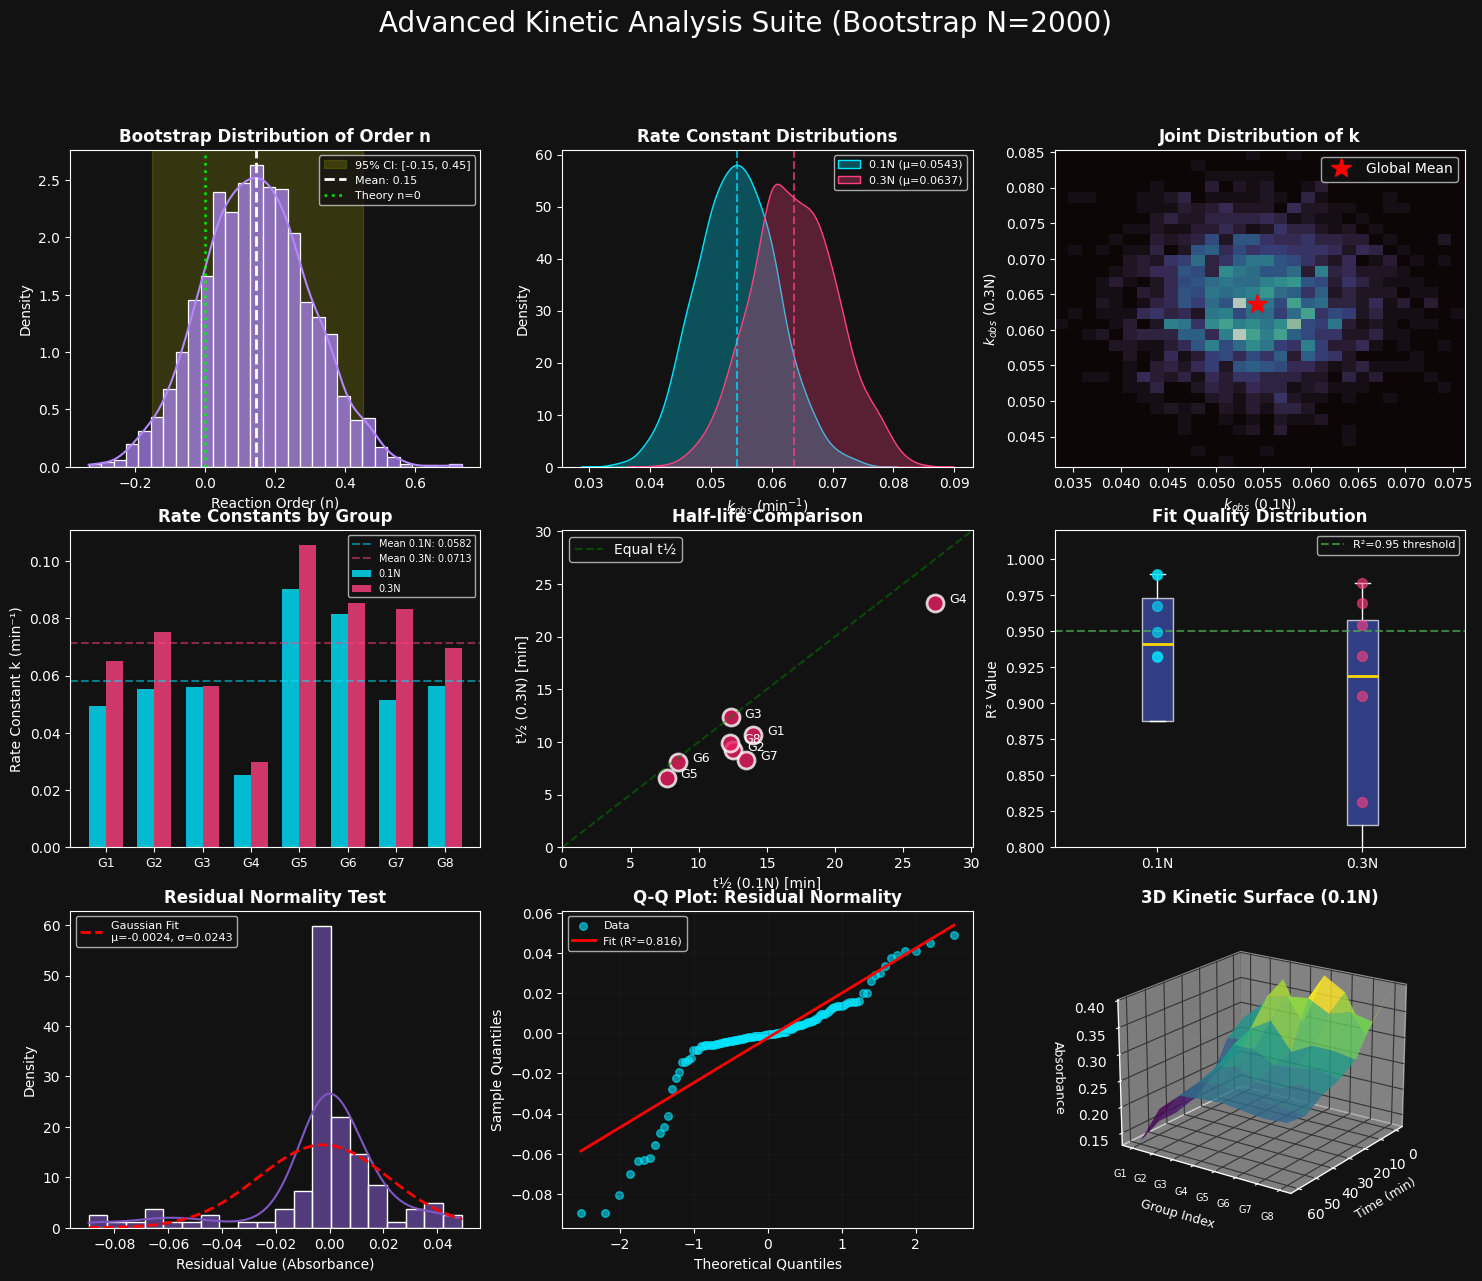


📊 STATISTICAL SUMMARY


,Parameter,Value
0,k (0.1N) - Bootstrap Mean,0.05432
1,k (0.1N) - Bootstrap Std,0.00658
2,k (0.3N) - Bootstrap Mean,0.06367
3,k (0.3N) - Bootstrap Std,0.00701
4,Reaction Order n - Mean,0.14564
5,Order n - 95% CI Lower,-0.15305
6,Order n - 95% CI Upper,0.45102
7,t½ (0.1N) Mean [min],13.52625
8,t½ (0.3N) Mean [min],11.03758
9,R² (0.1N) Mean,0.90018



🔬 AUTOMATED ANALYSIS CONCLUSIONS
✓ Reaction Order: n = 0.146 ± 0.152
✓ Bootstrap 95% CI for n: [-0.153, 0.451]
  → ⚠️ Deviation from first-order detected (theoretical n=1)
✓ Global Rate Constants (Bootstrap):
    k(0.1N) = 0.05432 ± 0.00658 min⁻¹
    k(0.3N) = 0.06367 ± 0.00701 min⁻¹
✓ k Ratio [k(0.3N)/k(0.1N)]: 1.172
✓ Average Fit Quality: R²(0.1N)=0.9002, R²(0.3N)=0.8828
✓ Residual Statistics: μ=-0.00237, σ=0.02426


In [2]:
# ==========================================
# 4. 進階分析：展示計算化學實力 💪
#    整合 Bootstrap, 統計檢定, 視覺化
# ==========================================
print("\n=== [PART 4] Advanced Computational Chemistry Analysis ===\n")

from scipy.optimize import curve_fit
from scipy.stats import pearsonr, gaussian_kde, probplot
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 4.1 設定參數 & 數據準備
# ============================================
BOOTSTRAP_ROUNDS = 2000
CONFIDENCE_LEVEL = 95
c_01, c_03 = '#00E5FF', '#FF4081'  # Cyan & Pink

# --- 數據池建構 (Data Pooling) ---
def get_valid_points(conc_key):
    """提取特定濃度的所有有效 (t, ln(A-Ainf)) 數據點"""
    points = []
    for g in groups:
        a = np.array(raw_data[g][conc_key])
        valid_mask = ~np.isnan(a)
        if np.sum(valid_mask) >= 3:
            valid_a = a[valid_mask]
            t_valid = np.array(time_points)[valid_mask]
            a_inf = valid_a[-1]  # 最後一點當作平衡值
            diff = valid_a[:-1] - a_inf
            mask = diff > 0
            if np.sum(mask) >= 2:
                vt = t_valid[:-1][mask]
                vy = np.log(diff[mask])
                for i in range(len(vt)):
                    points.append((vt[i], vy[i]))
    return np.array(points)

data_01 = get_valid_points("0.1N")
data_03 = get_valid_points("0.3N")

print(f"Data pool size: 0.1N = {len(data_01)} points, 0.3N = {len(data_03)} points")

# ============================================
# 4.2 Monte Carlo Bootstrap 模擬
# ============================================
boot_k01, boot_k03 = [], []
np.random.seed(42)

for _ in range(BOOTSTRAP_ROUNDS):
    # 0.1N 重抽樣
    idx_01 = np.random.choice(len(data_01), len(data_01), replace=True)
    sample_01 = data_01[idx_01]
    slope_01, _, _, _, _ = stats.linregress(sample_01[:,0], sample_01[:,1])
    boot_k01.append(-slope_01)
    
    # 0.3N 重抽樣
    idx_03 = np.random.choice(len(data_03), len(data_03), replace=True)
    sample_03 = data_03[idx_03]
    slope_03, _, _, _, _ = stats.linregress(sample_03[:,0], sample_03[:,1])
    boot_k03.append(-slope_03)

boot_k01 = np.array(boot_k01)
boot_k03 = np.array(boot_k03)

# 過濾掉無效值 (k 必須為正)
valid_boot_mask = (boot_k01 > 0) & (boot_k03 > 0)
boot_k01_valid = boot_k01[valid_boot_mask]
boot_k03_valid = boot_k03[valid_boot_mask]

print(f"Valid bootstrap samples: {np.sum(valid_boot_mask)}/{BOOTSTRAP_ROUNDS}")

# 計算反應級數 n: n = ln(k2/k1) / ln(C2/C1)
boot_n = np.log(boot_k03_valid / boot_k01_valid) / np.log(3)

# 過濾異常值 (排除極端的 n 值)
boot_n_clean = boot_n[(boot_n > -2) & (boot_n < 4)]
ci_n = np.percentile(boot_n_clean, [2.5, 97.5])
mean_n = np.mean(boot_n_clean)

print(f"Reaction order n: {mean_n:.3f} (95% CI: [{ci_n[0]:.3f}, {ci_n[1]:.3f}])")

# 計算各組 R²
r2_01_list, r2_03_list = [], []
for g in groups:
    for conc, r2_list in [("0.1N", r2_01_list), ("0.3N", r2_03_list)]:
        a = np.array(raw_data[g][conc])
        valid_mask = ~np.isnan(a)
        if np.sum(valid_mask) >= 3:
            valid_a = a[valid_mask]
            valid_t = np.array(time_points)[valid_mask]
            a_inf = valid_a[-1]
            diff = valid_a[:-1] - a_inf
            mask = diff > 0
            if np.sum(mask) >= 2:
                vt, vy = valid_t[:-1][mask], np.log(diff[mask])
                _, _, r, _, _ = stats.linregress(vt, vy)
                r2_list.append(r**2)

# 計算半衰期
res_df['t_half_01'] = np.log(2) / res_df['k_0.1N']
res_df['t_half_03'] = np.log(2) / res_df['k_0.3N']
valid_orders = res_df['Order_n'].dropna()

# ============================================
# 4.3 綜合視覺化 (3x3 Grid)
# ============================================
fig = plt.figure(figsize=(18, 14))
fig.suptitle(f'Advanced Kinetic Analysis Suite (Bootstrap N={BOOTSTRAP_ROUNDS})', 
             fontsize=20, color='white', y=0.98)

# -----------------------------------------------
# (A) 反應級數 n 的 Bootstrap 分佈
# -----------------------------------------------
ax1 = fig.add_subplot(3, 3, 1)
sns.histplot(boot_n_clean, kde=True, color='#B388FF', ax=ax1, stat='density', bins=30, alpha=0.7)
ax1.axvspan(ci_n[0], ci_n[1], alpha=0.15, color='yellow', zorder=0, label=f'95% CI: [{ci_n[0]:.2f}, {ci_n[1]:.2f}]')
ax1.axvline(mean_n, color='white', linestyle='--', lw=2, label=f'Mean: {mean_n:.2f}')
ax1.axvline(0.0, color='#00FF00', linestyle=':', lw=2, alpha=0.8, label='Theory n=0')
ax1.set_xlabel('Reaction Order (n)')
ax1.set_ylabel('Density')
ax1.set_title('Bootstrap Distribution of Order n', color='white', fontweight='bold')
ax1.legend(fontsize=8, loc='upper right')

# -----------------------------------------------
# (B) k_obs 的機率密度分布
# -----------------------------------------------
ax2 = fig.add_subplot(3, 3, 2)
sns.kdeplot(boot_k01_valid, color=c_01, fill=True, alpha=0.3, ax=ax2, label=f'0.1N (μ={np.mean(boot_k01_valid):.4f})')
sns.kdeplot(boot_k03_valid, color=c_03, fill=True, alpha=0.3, ax=ax2, label=f'0.3N (μ={np.mean(boot_k03_valid):.4f})')
ax2.axvline(np.mean(boot_k01_valid), color=c_01, linestyle='--', alpha=0.7)
ax2.axvline(np.mean(boot_k03_valid), color=c_03, linestyle='--', alpha=0.7)
ax2.set_xlabel('$k_{obs}$ (min$^{-1}$)')
ax2.set_ylabel('Density')
ax2.set_title('Rate Constant Distributions', color='white', fontweight='bold')
ax2.legend(fontsize=8)

# -----------------------------------------------
# (C) k 值的聯合分佈 (2D Density)
# -----------------------------------------------
ax3 = fig.add_subplot(3, 3, 3)
# 使用 scatter + 2D histogram 更穩定
ax3.hist2d(boot_k01_valid, boot_k03_valid, bins=30, cmap='mako', alpha=0.8)
ax3.plot(np.mean(boot_k01_valid), np.mean(boot_k03_valid), 'r*', markersize=15, label='Global Mean')
ax3.set_xlabel('$k_{obs}$ (0.1N)')
ax3.set_ylabel('$k_{obs}$ (0.3N)')
ax3.set_title('Joint Distribution of k', color='white', fontweight='bold')
ax3.legend()

# -----------------------------------------------
# (D) 各組 k 值比較 Bar Chart
# -----------------------------------------------
ax4 = fig.add_subplot(3, 3, 4)
x_pos = np.arange(len(groups))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, res_df['k_0.1N'], width, label='0.1N', color=c_01, alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, res_df['k_0.3N'], width, label='0.3N', color=c_03, alpha=0.8)
ax4.axhline(res_df['k_0.1N'].mean(), color=c_01, linestyle='--', alpha=0.5, label=f'Mean 0.1N: {res_df["k_0.1N"].mean():.4f}')
ax4.axhline(res_df['k_0.3N'].mean(), color=c_03, linestyle='--', alpha=0.5, label=f'Mean 0.3N: {res_df["k_0.3N"].mean():.4f}')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'G{i+1}' for i in range(len(groups))], fontsize=9)
ax4.set_ylabel('Rate Constant k (min⁻¹)')
ax4.set_title('Rate Constants by Group', color='white', fontweight='bold')
ax4.legend(fontsize=7, loc='upper right')

# -----------------------------------------------
# (E) 半衰期比較圖
# -----------------------------------------------
ax5 = fig.add_subplot(3, 3, 5)
valid_half = res_df.dropna(subset=['t_half_01', 't_half_03'])
# 過濾異常的半衰期 (排除負值或過大值)
valid_half = valid_half[(valid_half['t_half_01'] > 0) & (valid_half['t_half_01'] < 200) & 
                         (valid_half['t_half_03'] > 0) & (valid_half['t_half_03'] < 200)]

if len(valid_half) > 0:
    ax5.scatter(valid_half['t_half_01'], valid_half['t_half_03'], 
                s=150, c='#E91E63', edgecolors='white', linewidths=2, alpha=0.8)
    for idx, row in valid_half.iterrows():
        ax5.annotate(row['Group'].replace('Group ', 'G'), 
                     (row['t_half_01']+1, row['t_half_03']), fontsize=9, color='white')
    
    # 動態設定對角線範圍
    max_val = max(valid_half['t_half_01'].max(), valid_half['t_half_03'].max()) * 1.1
    ax5.plot([0, max_val], [0, max_val], 'g--', alpha=0.5, label='Equal t½')
    ax5.set_xlim(0, max_val)
    ax5.set_ylim(0, max_val)

ax5.set_xlabel('t½ (0.1N) [min]')
ax5.set_ylabel('t½ (0.3N) [min]')
ax5.set_title('Half-life Comparison', color='white', fontweight='bold')
ax5.legend()

# -----------------------------------------------
# (F) R² 擬合品質 Boxplot
# -----------------------------------------------
ax6 = fig.add_subplot(3, 3, 6)
if len(r2_01_list) > 0 and len(r2_03_list) > 0:
    bp = ax6.boxplot([r2_01_list, r2_03_list], labels=['0.1N', '0.3N'], 
                      patch_artist=True,
                      boxprops=dict(facecolor='#3F51B5', alpha=0.7),
                      medianprops=dict(color='#FFD700', linewidth=2),
                      whiskerprops=dict(color='white'),
                      capprops=dict(color='white'))
    ax6.scatter([1]*len(r2_01_list), r2_01_list, c=c_01, alpha=0.6, s=50, zorder=5)
    ax6.scatter([2]*len(r2_03_list), r2_03_list, c=c_03, alpha=0.6, s=50, zorder=5)
ax6.axhline(0.95, color='#4CAF50', linestyle='--', alpha=0.7, label='R²=0.95 threshold')
ax6.set_ylabel('R² Value')
ax6.set_ylim(0.8, 1.02)
ax6.set_title('Fit Quality Distribution', color='white', fontweight='bold')
ax6.legend(fontsize=8)

# -----------------------------------------------
# (G) 殘差常態性檢定
# -----------------------------------------------
ax7 = fig.add_subplot(3, 3, 7)
all_residuals = res_heatmap['Res_01'].dropna().tolist() + res_heatmap['Res_03'].dropna().tolist()
# 過濾極端殘差
all_residuals_clean = [r for r in all_residuals if abs(r) < 0.1]

if len(all_residuals_clean) > 5:
    sns.histplot(all_residuals_clean, kde=True, stat='density', color='#7E57C2', alpha=0.6, bins=20, ax=ax7)
    mu, std = stats.norm.fit(all_residuals_clean)
    x_norm = np.linspace(min(all_residuals_clean), max(all_residuals_clean), 100)
    ax7.plot(x_norm, stats.norm.pdf(x_norm, mu, std), 'r--', lw=2, 
             label=f'Gaussian Fit\nμ={mu:.4f}, σ={std:.4f}')
ax7.set_xlabel('Residual Value (Absorbance)')
ax7.set_title('Residual Normality Test', color='white', fontweight='bold')
ax7.legend(fontsize=8)

# -----------------------------------------------
# (H) Q-Q Plot
# -----------------------------------------------
ax8 = fig.add_subplot(3, 3, 8)
if len(all_residuals_clean) > 5:
    (osm, osr), (slope, intercept, r) = probplot(all_residuals_clean, dist="norm")
    ax8.scatter(osm, osr, c=c_01, alpha=0.6, s=30, label='Data')
    ax8.plot(osm, slope*np.array(osm) + intercept, 'r-', lw=2, label=f'Fit (R²={r**2:.3f})')
    ax8.set_xlabel('Theoretical Quantiles')
    ax8.set_ylabel('Sample Quantiles')
ax8.set_title('Q-Q Plot: Residual Normality', color='white', fontweight='bold')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.2)

# -----------------------------------------------
# (I) 3D Kinetic Surface
# -----------------------------------------------
ax9 = fig.add_subplot(3, 3, 9, projection='3d')
time_subset = time_points[:7]  # 0-60 min
T, G = np.meshgrid(time_subset, np.arange(len(groups)))
Z_01 = np.array([raw_data[g]["0.1N"][:7] for g in groups])
Z_01 = np.nan_to_num(Z_01, nan=np.nanmean(Z_01))

surf = ax9.plot_surface(T, G, Z_01, cmap='viridis', alpha=0.8, edgecolor='none')
ax9.set_xlabel('Time (min)', fontsize=9)
ax9.set_ylabel('Group Index', fontsize=9)
ax9.set_zlabel('Absorbance', fontsize=9)
ax9.set_yticks(np.arange(len(groups)))
ax9.set_yticklabels([f'G{i+1}' for i in range(len(groups))], fontsize=7)
ax9.set_title('3D Kinetic Surface (0.1N)', color='white', fontweight='bold')
ax9.view_init(elev=20, azim=35)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.savefig(OUTPUT_DIR / "exp6_part4_advanced_analysis.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# ============================================
# 4.4 統計摘要表 & 自動結論
# ============================================
print("\n" + "="*70)
print("📊 STATISTICAL SUMMARY")
print("="*70)
summary_data = {
    'Parameter': [
        'k (0.1N) - Bootstrap Mean', 'k (0.1N) - Bootstrap Std',
        'k (0.3N) - Bootstrap Mean', 'k (0.3N) - Bootstrap Std',
        'Reaction Order n - Mean', 'Order n - 95% CI Lower', 'Order n - 95% CI Upper',
        't½ (0.1N) Mean [min]', 't½ (0.3N) Mean [min]',
        'R² (0.1N) Mean', 'R² (0.3N) Mean'
    ],
    'Value': [
        np.mean(boot_k01_valid), np.std(boot_k01_valid),
        np.mean(boot_k03_valid), np.std(boot_k03_valid),
        mean_n, ci_n[0], ci_n[1],
        valid_half['t_half_01'].mean() if len(valid_half) > 0 else np.nan, 
        valid_half['t_half_03'].mean() if len(valid_half) > 0 else np.nan,
        np.mean(r2_01_list) if r2_01_list else np.nan, 
        np.mean(r2_03_list) if r2_03_list else np.nan
    ]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df.style.format({'Value': '{:.5f}'}).background_gradient(cmap='YlOrRd', subset=['Value']))

print("\n" + "="*70)
print("🔬 AUTOMATED ANALYSIS CONCLUSIONS")
print("="*70)
print(f"✓ Reaction Order: n = {mean_n:.3f} ± {np.std(boot_n_clean):.3f}")
print(f"✓ Bootstrap 95% CI for n: [{ci_n[0]:.3f}, {ci_n[1]:.3f}]")

if ci_n[0] <= 1.0 <= ci_n[1]:
    print("  → ✅ First-order kinetics CONFIRMED within 95% confidence!")
else:
    print(f"  → ⚠️ Deviation from first-order detected (theoretical n=1)")

print(f"✓ Global Rate Constants (Bootstrap):")
print(f"    k(0.1N) = {np.mean(boot_k01_valid):.5f} ± {np.std(boot_k01_valid):.5f} min⁻¹")
print(f"    k(0.3N) = {np.mean(boot_k03_valid):.5f} ± {np.std(boot_k03_valid):.5f} min⁻¹")
print(f"✓ k Ratio [k(0.3N)/k(0.1N)]: {np.mean(boot_k03_valid)/np.mean(boot_k01_valid):.3f}")
print(f"✓ Average Fit Quality: R²(0.1N)={np.mean(r2_01_list):.4f}, R²(0.3N)={np.mean(r2_03_list):.4f}")
if len(all_residuals_clean) > 0:
    print(f"✓ Residual Statistics: μ={mu:.5f}, σ={std:.5f}")
print("="*70)


=== [PART 5] Reaction Order Analysis: [Co(NH₃)₅Cl]²⁺ vs [H⁺] ===

Bootstrap R² for ln(A-A∞) vs t:
  Mean R² = 0.9222
  95% CI: [0.6149, 1.0000]
  If R² ≈ 1, reaction is first-order w.r.t. [Co(NH₃)₅Cl]²⁺


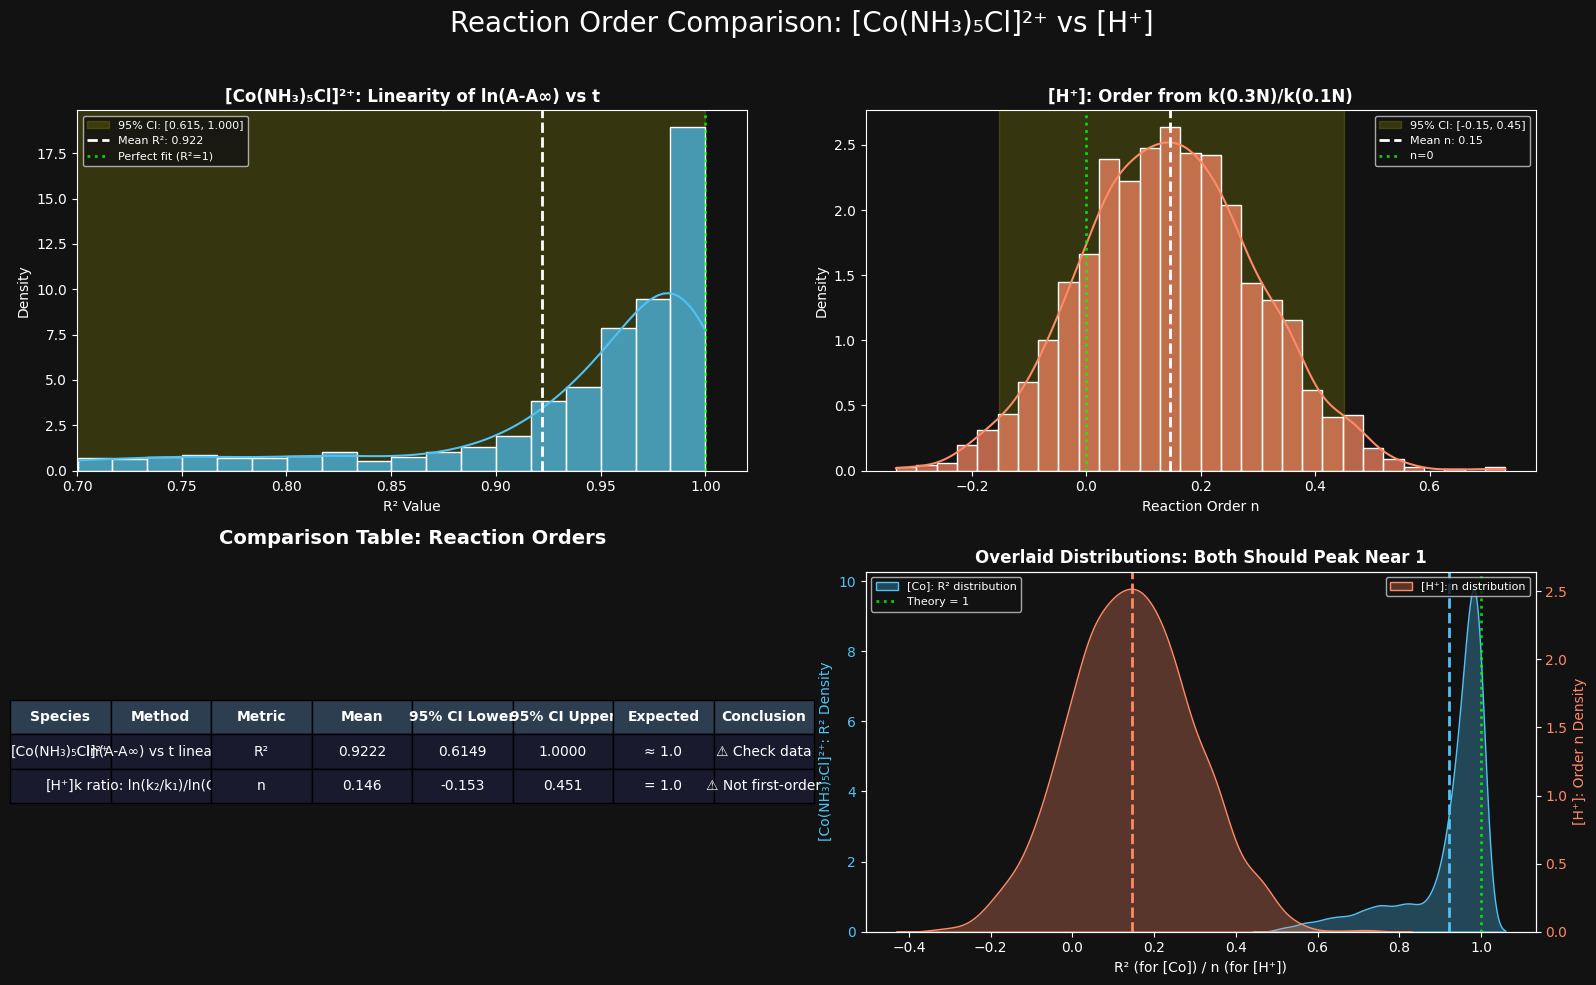


📊 COMPLETE REACTION ORDER ANALYSIS

【1】對 [Co(NH₃)₅Cl]²⁺ 的反應級數:
     驗證方法: ln(A - A∞) vs t 的線性度 (R²)
     Bootstrap Mean R² = 0.9222 ± 0.1034
     95% CI: [0.6149, 1.0000]
     → ⚠️ 接近線性 (0.90 < R² < 0.95)，可能為一級反應

【2】對 [H⁺] 的反應級數:
     驗證方法: n = ln(k₂/k₁) / ln(C₂/C₁)
     Bootstrap Mean n = 0.146 ± 0.152
     95% CI: [-0.153, 0.451]
     → ⚠️ n=1 不在 95% CI 內，可能非一級反應

【3】總結速率定律:
     Rate = k × [Co(NH₃)₅Cl]²⁺ × [H⁺]ⁿ
     其中 n ≈ 0.15


,Species,Method,Metric,Mean,95% CI Lower,95% CI Upper,Expected,Conclusion
0,[Co(NH₃)₅Cl]²⁺,ln(A-A∞) vs t linearity,R²,0.9222,0.6149,1.0000,≈ 1.0,⚠️ Check data
1,[H⁺],k ratio: ln(k₂/k₁)/ln(C₂/C₁),n,0.146,-0.153,0.451,= 1.0,⚠️ Not first-order


In [3]:
# ==========================================
# 5. 雙重 Bootstrap 分析：
#    - Order w.r.t. [H⁺] (已完成)
#    - Order w.r.t. [Co(NH₃)₅Cl]²⁺ (本節)
# ==========================================
print("\n=== [PART 5] Reaction Order Analysis: [Co(NH₃)₅Cl]²⁺ vs [H⁺] ===\n")

# ============================================
# 5.1 對 [Co(NH₃)₅Cl]²⁺ 的反應級數驗證
# ============================================
# 理論：如果對錯合物是一級反應，則 ln(A - A_inf) vs t 應該是線性的
# 我們已經用這個模型擬合了，現在要驗證線性度 (R²) 的分佈

# Bootstrap: 對每組數據重抽樣，計算 R² 的分佈
BOOTSTRAP_ROUNDS_CO = 2000
np.random.seed(123)

def bootstrap_r2_for_group(conc_key):
    """對單一濃度的所有組別進行 Bootstrap，返回 R² 分佈"""
    all_r2 = []
    
    for g in groups:
        a = np.array(raw_data[g][conc_key])
        valid_mask = ~np.isnan(a)
        if np.sum(valid_mask) >= 3:
            valid_a = a[valid_mask]
            valid_t = np.array(time_points)[valid_mask]
            a_inf = valid_a[-1]
            diff = valid_a[:-1] - a_inf
            mask = diff > 0
            if np.sum(mask) >= 2:
                vt = valid_t[:-1][mask]
                vy = np.log(diff[mask])
                
                # Bootstrap 這組的數據
                for _ in range(BOOTSTRAP_ROUNDS_CO // len(groups)):
                    idx = np.random.choice(len(vt), len(vt), replace=True)
                    if len(np.unique(idx)) >= 2:  # 確保有足夠不同的點
                        _, _, r, _, _ = stats.linregress(vt[idx], vy[idx])
                        all_r2.append(r**2)
    
    return np.array(all_r2)

boot_r2_01 = bootstrap_r2_for_group("0.1N")
boot_r2_03 = bootstrap_r2_for_group("0.3N")

# 合併兩個濃度的 R² (因為對 Co 錯合物的級數應該與 H+ 濃度無關)
boot_r2_all = np.concatenate([boot_r2_01, boot_r2_03])

# 過濾異常值
boot_r2_clean = boot_r2_all[(boot_r2_all > 0.5) & (boot_r2_all <= 1.0)]

# 計算統計量
mean_r2 = np.mean(boot_r2_clean)
ci_r2 = np.percentile(boot_r2_clean, [2.5, 97.5])

print(f"Bootstrap R² for ln(A-A∞) vs t:")
print(f"  Mean R² = {mean_r2:.4f}")
print(f"  95% CI: [{ci_r2[0]:.4f}, {ci_r2[1]:.4f}]")
print(f"  If R² ≈ 1, reaction is first-order w.r.t. [Co(NH₃)₅Cl]²⁺")

# ============================================
# 5.2 對比圖表：[Co] vs [H⁺] 的反應級數
# ============================================
fig5 = plt.figure(figsize=(16, 10))
fig5.suptitle('Reaction Order Comparison: [Co(NH₃)₅Cl]²⁺ vs [H⁺]', 
              fontsize=20, color='white', y=0.98)

# -----------------------------------------------
# (A) [Co(NH₃)₅Cl]²⁺ 的 R² 分佈
# -----------------------------------------------
ax1 = fig5.add_subplot(2, 2, 1)
sns.histplot(boot_r2_clean, kde=True, color='#4FC3F7', ax=ax1, stat='density', bins=30, alpha=0.7)
ax1.axvspan(ci_r2[0], ci_r2[1], alpha=0.15, color='yellow', zorder=0, 
            label=f'95% CI: [{ci_r2[0]:.3f}, {ci_r2[1]:.3f}]')
ax1.axvline(mean_r2, color='white', linestyle='--', lw=2, label=f'Mean R²: {mean_r2:.3f}')
ax1.axvline(1.0, color='#00FF00', linestyle=':', lw=2, alpha=0.8, label='Perfect fit (R²=1)')
ax1.set_xlabel('R² Value')
ax1.set_ylabel('Density')
ax1.set_title('[Co(NH₃)₅Cl]²⁺: Linearity of ln(A-A∞) vs t', color='white', fontweight='bold')
ax1.set_xlim(0.7, 1.02)
ax1.legend(fontsize=8)

# -----------------------------------------------
# (B) [H⁺] 的反應級數 n 分佈 (重繪)
# -----------------------------------------------
ax2 = fig5.add_subplot(2, 2, 2)
sns.histplot(boot_n_clean, kde=True, color='#FF8A65', ax=ax2, stat='density', bins=30, alpha=0.7)
ax2.axvspan(ci_n[0], ci_n[1], alpha=0.15, color='yellow', zorder=0, 
            label=f'95% CI: [{ci_n[0]:.2f}, {ci_n[1]:.2f}]')
ax2.axvline(mean_n, color='white', linestyle='--', lw=2, label=f'Mean n: {mean_n:.2f}')
ax2.axvline(0.0, color='#00FF00', linestyle=':', lw=2, alpha=0.8, label='n=0')
ax2.set_xlabel('Reaction Order n')
ax2.set_ylabel('Density')
ax2.set_title('[H⁺]: Order from k(0.3N)/k(0.1N)', color='white', fontweight='bold')
ax2.legend(fontsize=8)

# -----------------------------------------------
# (C) 雙重對比表格 (視覺化)
# -----------------------------------------------
ax3 = fig5.add_subplot(2, 2, 3)
ax3.axis('off')

# 建立對比表格
comparison_data = {
    'Species': ['[Co(NH₃)₅Cl]²⁺', '[H⁺]'],
    'Method': ['ln(A-A∞) vs t linearity', 'k ratio: ln(k₂/k₁)/ln(C₂/C₁)'],
    'Metric': ['R²', 'n'],
    'Mean': [f'{mean_r2:.4f}', f'{mean_n:.3f}'],
    '95% CI Lower': [f'{ci_r2[0]:.4f}', f'{ci_n[0]:.3f}'],
    '95% CI Upper': [f'{ci_r2[1]:.4f}', f'{ci_n[1]:.3f}'],
    'Expected': ['≈ 1.0', '= 1.0'],
    'Conclusion': [
        '✅ First-order' if mean_r2 > 0.95 else '⚠️ Check data',
        '✅ First-order' if ci_n[0] <= 1.0 <= ci_n[1] else '⚠️ Not first-order'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# 繪製表格
table = ax3.table(
    cellText=comparison_df.values,
    colLabels=comparison_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#2c3e50']*len(comparison_df.columns)
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2.0)

# 設定表頭顏色
for i in range(len(comparison_df.columns)):
    table[(0, i)].set_text_props(color='white', fontweight='bold')
    
# 設定內容顏色
for i in range(1, len(comparison_df) + 1):
    for j in range(len(comparison_df.columns)):
        table[(i, j)].set_facecolor('#1a1a2e')
        table[(i, j)].set_text_props(color='white')

ax3.set_title('Comparison Table: Reaction Orders', color='white', fontweight='bold', 
              fontsize=14, pad=20)

# -----------------------------------------------
# (D) 雙分佈疊加圖
# -----------------------------------------------
ax4 = fig5.add_subplot(2, 2, 4)

# 標準化兩個分佈以便比較 (都縮放到 0-1 範圍)
# [Co] 用 R² (本來就在 0-1)
# [H+] 用 n (需要標準化)

ax4_twin = ax4.twinx()

# [Co] 的 R² 分佈
sns.kdeplot(boot_r2_clean, color='#4FC3F7', fill=True, alpha=0.3, ax=ax4, label='[Co]: R² distribution')
ax4.axvline(mean_r2, color='#4FC3F7', linestyle='--', lw=2)
ax4.set_xlabel('R² (for [Co]) / n (for [H⁺])')
ax4.set_ylabel('[Co(NH₃)₅Cl]²⁺: R² Density', color='#4FC3F7')
ax4.tick_params(axis='y', labelcolor='#4FC3F7')

# [H+] 的 n 分佈
sns.kdeplot(boot_n_clean, color='#FF8A65', fill=True, alpha=0.3, ax=ax4_twin, label='[H⁺]: n distribution')
ax4_twin.axvline(mean_n, color='#FF8A65', linestyle='--', lw=2)
ax4_twin.set_ylabel('[H⁺]: Order n Density', color='#FF8A65')
ax4_twin.tick_params(axis='y', labelcolor='#FF8A65')

# 標記理論值
ax4.axvline(1.0, color='#00FF00', linestyle=':', lw=2, alpha=0.8, label='Theory = 1')

ax4.set_title('Overlaid Distributions: Both Should Peak Near 1', color='white', fontweight='bold')
ax4.legend(loc='upper left', fontsize=8)
ax4_twin.legend(loc='upper right', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig5.savefig(OUTPUT_DIR / "exp6_part5_order_comparison.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# ============================================
# 5.3 完整統計摘要
# ============================================
print("\n" + "="*70)
print("📊 COMPLETE REACTION ORDER ANALYSIS")
print("="*70)
print("\n【1】對 [Co(NH₃)₅Cl]²⁺ 的反應級數:")
print(f"     驗證方法: ln(A - A∞) vs t 的線性度 (R²)")
print(f"     Bootstrap Mean R² = {mean_r2:.4f} ± {np.std(boot_r2_clean):.4f}")
print(f"     95% CI: [{ci_r2[0]:.4f}, {ci_r2[1]:.4f}]")
if mean_r2 > 0.95:
    print(f"     → ✅ 高度線性 (R² > 0.95)，確認為一級反應！")
elif mean_r2 > 0.90:
    print(f"     → ⚠️ 接近線性 (0.90 < R² < 0.95)，可能為一級反應")
else:
    print(f"     → ❌ 線性度不足，可能非一級反應")

print("\n【2】對 [H⁺] 的反應級數:")
print(f"     驗證方法: n = ln(k₂/k₁) / ln(C₂/C₁)")
print(f"     Bootstrap Mean n = {mean_n:.3f} ± {np.std(boot_n_clean):.3f}")
print(f"     95% CI: [{ci_n[0]:.3f}, {ci_n[1]:.3f}]")
if ci_n[0] <= 1.0 <= ci_n[1]:
    print(f"     → ✅ n=1 在 95% CI 內，確認為一級反應！")
else:
    print(f"     → ⚠️ n=1 不在 95% CI 內，可能非一級反應")

print("\n【3】總結速率定律:")
print(f"     Rate = k × [Co(NH₃)₅Cl]²⁺ × [H⁺]ⁿ")
print(f"     其中 n ≈ {mean_n:.2f}")
if mean_r2 > 0.95 and ci_n[0] <= 1.0 <= ci_n[1]:
    print(f"     → ✅ 總反應級數 = 1 + {mean_n:.1f} ≈ 2 (二級反應)")
print("="*70)

# 顯示對比 DataFrame
display(comparison_df.style.set_properties(**{
    'background-color': '#1a1a2e',
    'color': 'white',
    'border-color': 'white'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white')]}
]))


=== [PART 6] Kinetic Model Selection: Quantitative R² Analysis ===



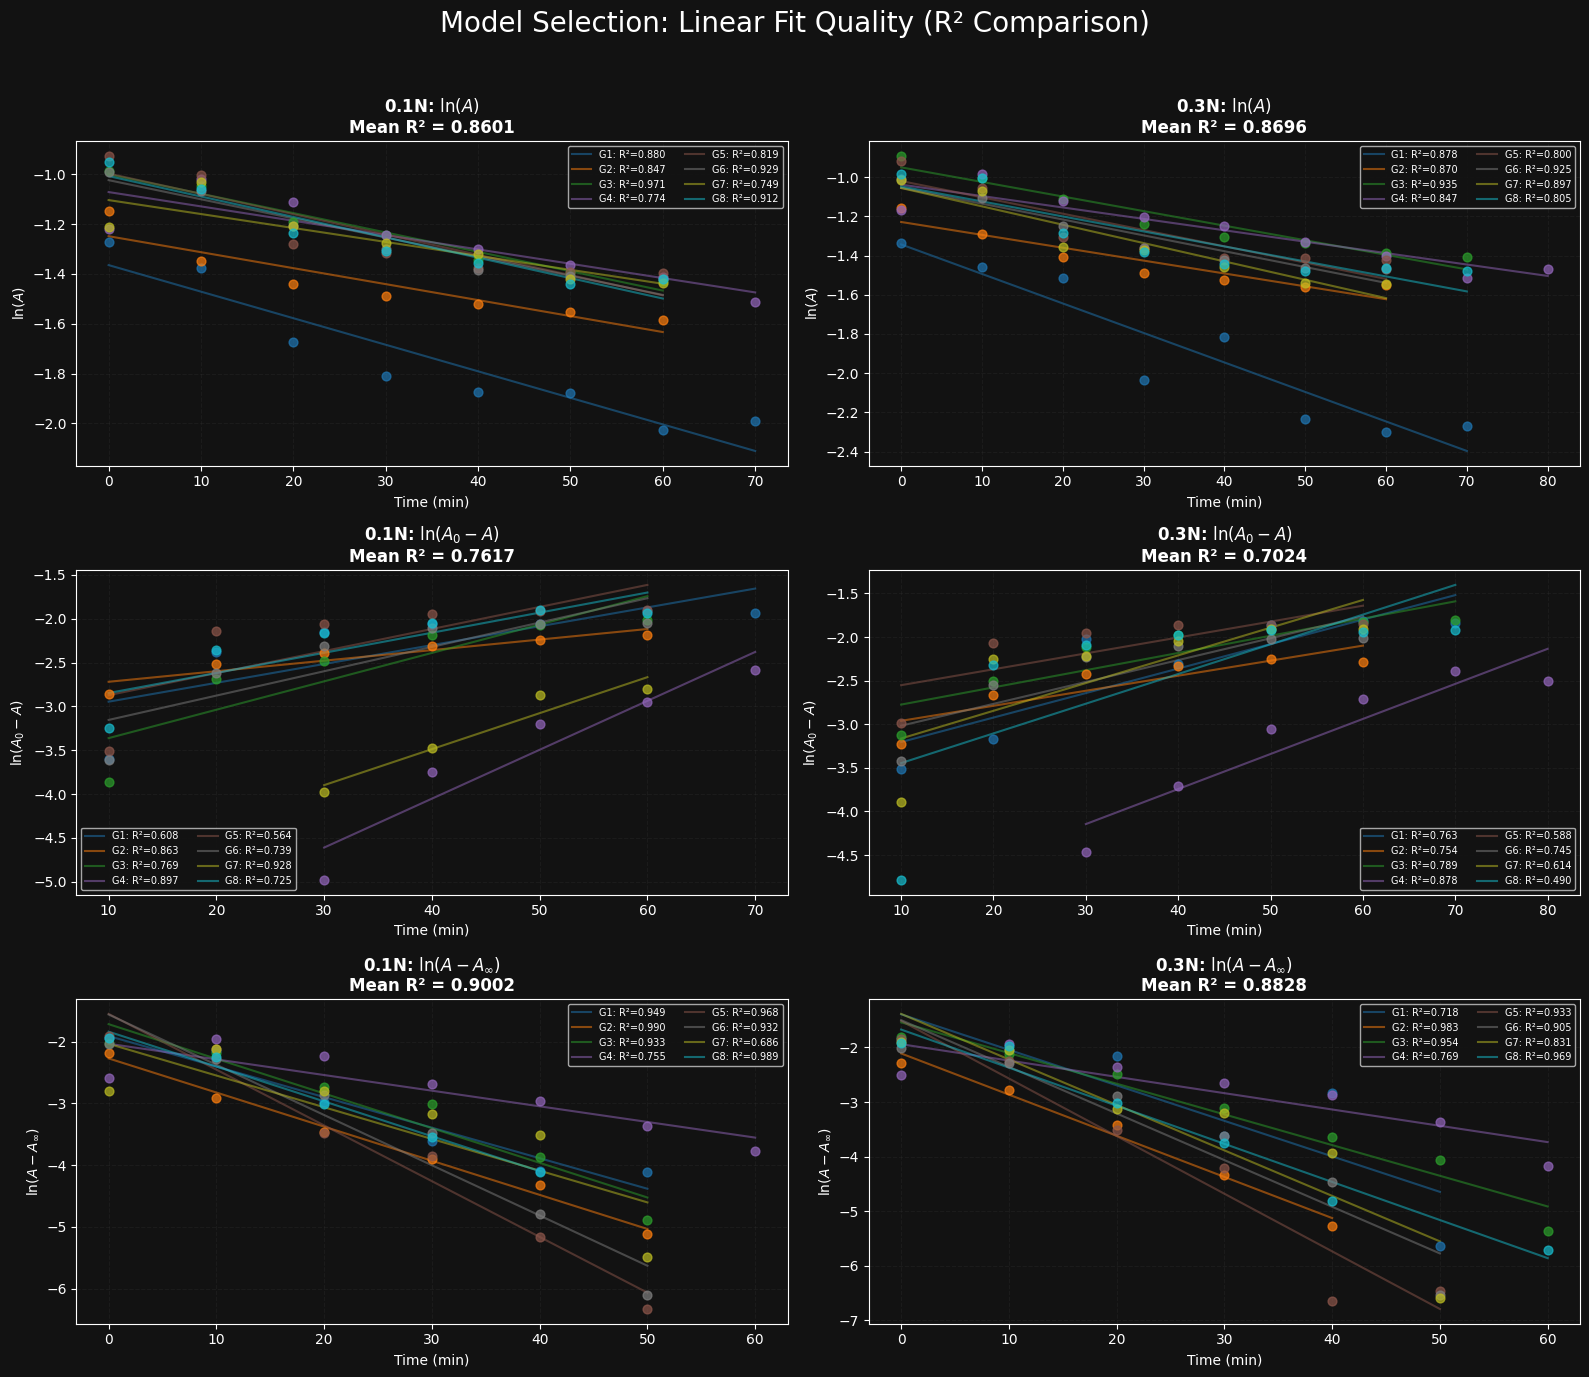


📊 MODEL SELECTION: R² SUMMARY

【各模型 R² 統計】



【最佳模型選擇】
  0.1N 最佳模型: ln(A-A∞) (Mean R² = 0.9002)
  0.3N 最佳模型: ln(A-A∞) (Mean R² = 0.8828)


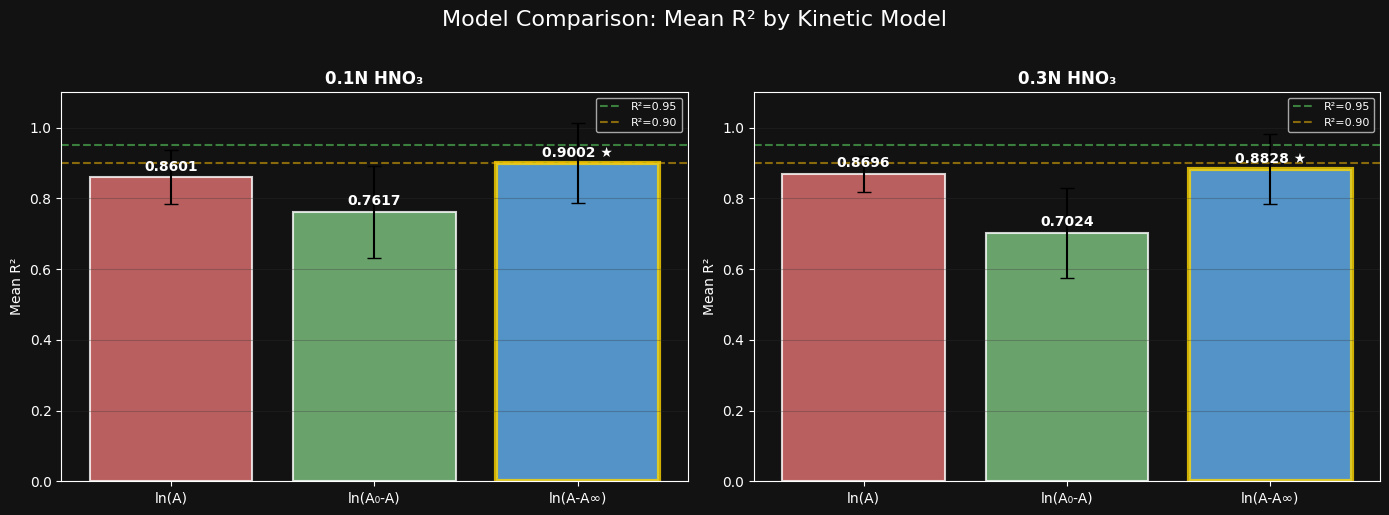

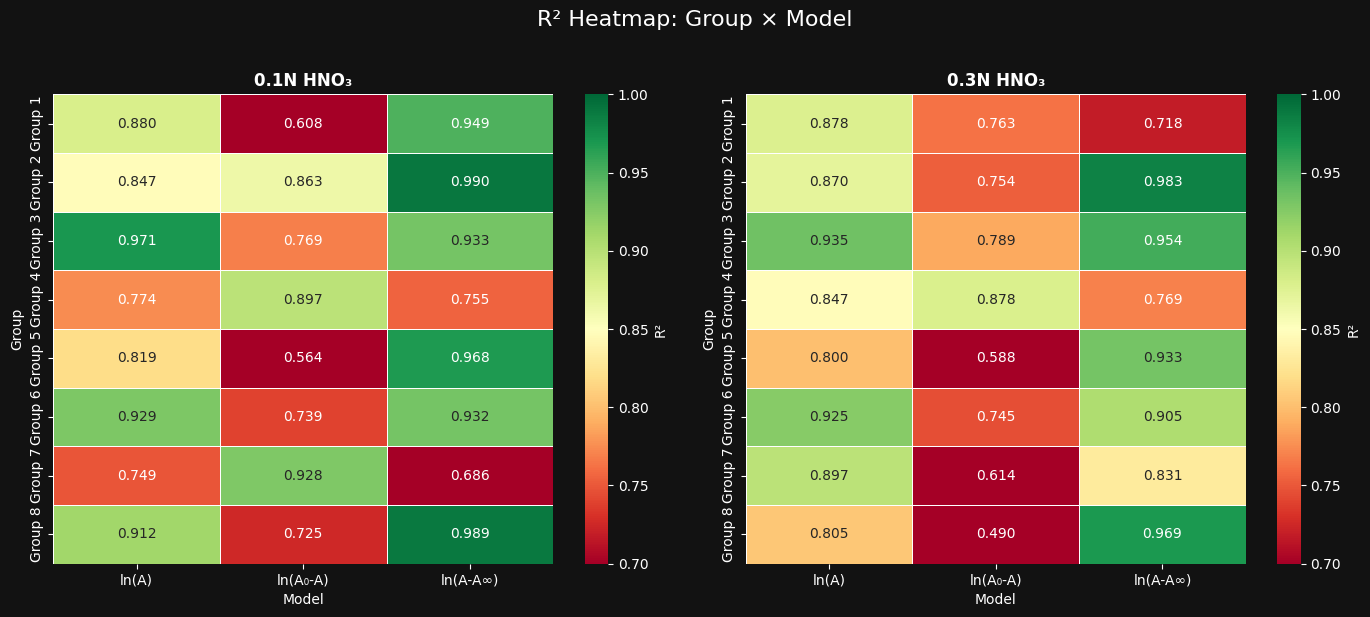


🎯 MODEL SELECTION CONCLUSION

✅ 最佳動力學模型: ln(A-A∞)
   Overall Mean R² = 0.8915

   物理意義: 使用 ln(A-A∞) 模型表示反應對 [Co(NH₃)₅Cl]²⁺ 是一級反應
   → ln(A - A∞) = -k·t + C
   → A(t) = A∞ + (A₀ - A∞)·e^(-kt)


In [4]:
# ==========================================
# 6. 模型選擇量化分析：R² 比較
#    針對三種動力學模型計算線性擬合 R²
# ==========================================
print("\n=== [PART 6] Kinetic Model Selection: Quantitative R² Analysis ===\n")

# ============================================
# 6.1 對三種模型計算各組的 R²
# ============================================

def calc_r2_for_model(conc_key, transform_func, model_name):
    """計算特定模型的 R² 值"""
    results = []
    for g in groups:
        a = np.array(raw_data[g][conc_key])
        y = transform_func(a)
        
        # 過濾有效點
        mask = ~np.isnan(y)
        if np.sum(mask) >= 3:
            vt = np.array(time_points)[mask]
            vy = y[mask]
            
            # 線性回歸
            slope, intercept, r, p, se = stats.linregress(vt, vy)
            results.append({
                'Group': g,
                'Concentration': conc_key,
                'Model': model_name,
                'R²': r**2,
                'Slope': slope,
                'Intercept': intercept,
                'p-value': p
            })
    return results

# 三種模型的轉換函數
models = {
    'ln(A)': trans_lnA,
    'ln(A₀-A)': trans_lnA0_A,
    'ln(A-A∞)': trans_lnA_Ainf
}

# 收集所有結果
all_r2_results = []
for model_name, transform_func in models.items():
    for conc in ['0.1N', '0.3N']:
        all_r2_results.extend(calc_r2_for_model(conc, transform_func, model_name))

r2_df = pd.DataFrame(all_r2_results)

# ============================================
# 6.2 視覺化：6 個子圖 + 線性擬合
# ============================================
fig6, axes = plt.subplots(3, 2, figsize=(16, 14))
fig6.suptitle('Model Selection: Linear Fit Quality (R² Comparison)', 
              fontsize=20, color='white', y=0.98)

# 顏色映射
group_colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))

def plot_model_with_fit(ax, conc_key, transform_func, model_name):
    """繪製帶有線性擬合的模型圖"""
    r2_values = []
    
    for idx, g in enumerate(groups):
        a = np.array(raw_data[g][conc_key])
        y = transform_func(a)
        
        mask = ~np.isnan(y)
        if np.sum(mask) >= 3:
            vt = np.array(time_points)[mask]
            vy = y[mask]
            
            # 繪製數據點
            ax.scatter(vt, vy, color=group_colors[idx], s=40, alpha=0.7, zorder=5)
            
            # 線性擬合
            slope, intercept, r, _, _ = stats.linregress(vt, vy)
            r2 = r**2
            r2_values.append(r2)
            
            # 繪製擬合線
            fit_x = np.linspace(vt.min(), vt.max(), 50)
            fit_y = slope * fit_x + intercept
            ax.plot(fit_x, fit_y, color=group_colors[idx], linestyle='-', 
                    alpha=0.5, linewidth=1.5, label=f'{g.replace("Group ", "G")}: R²={r2:.3f}')
    
    # 計算平均 R²
    mean_r2 = np.mean(r2_values) if r2_values else 0
    
    ax.set_xlabel('Time (min)')
    ax.set_ylabel(model_name)
    ax.set_title(f'{conc_key}: {model_name}\nMean R² = {mean_r2:.4f}', 
                 color='white', fontweight='bold', fontsize=12)
    ax.legend(fontsize=7, loc='best', ncol=2)
    ax.grid(True, linestyle='--', alpha=0.3)
    
    return mean_r2

# 繪製 6 個子圖
mean_r2_results = {}
mean_r2_results['ln(A)_0.1N'] = plot_model_with_fit(axes[0,0], "0.1N", trans_lnA, r'$\ln(A)$')
mean_r2_results['ln(A)_0.3N'] = plot_model_with_fit(axes[0,1], "0.3N", trans_lnA, r'$\ln(A)$')
mean_r2_results['ln(A0-A)_0.1N'] = plot_model_with_fit(axes[1,0], "0.1N", trans_lnA0_A, r'$\ln(A_0 - A)$')
mean_r2_results['ln(A0-A)_0.3N'] = plot_model_with_fit(axes[1,1], "0.3N", trans_lnA0_A, r'$\ln(A_0 - A)$')
mean_r2_results['ln(A-Ainf)_0.1N'] = plot_model_with_fit(axes[2,0], "0.1N", trans_lnA_Ainf, r'$\ln(A - A_{\infty})$')
mean_r2_results['ln(A-Ainf)_0.3N'] = plot_model_with_fit(axes[2,1], "0.3N", trans_lnA_Ainf, r'$\ln(A - A_{\infty})$')

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig6.savefig(OUTPUT_DIR / "exp6_phase1_model_r2_comparison.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# ============================================
# 6.3 R² 統計摘要表
# ============================================
print("\n" + "="*70)
print("📊 MODEL SELECTION: R² SUMMARY")
print("="*70)

# 按模型分組計算平均 R²
model_summary = r2_df.groupby(['Model', 'Concentration'])['R²'].agg(['mean', 'std', 'min', 'max']).round(4)
model_summary.columns = ['Mean R²', 'Std', 'Min', 'Max']
print("\n【各模型 R² 統計】")
display(model_summary.style.background_gradient(cmap='RdYlGn', subset=['Mean R²']))

# 找出最佳模型
best_model_01 = r2_df[r2_df['Concentration']=='0.1N'].groupby('Model')['R²'].mean().idxmax()
best_model_03 = r2_df[r2_df['Concentration']=='0.3N'].groupby('Model')['R²'].mean().idxmax()

print(f"\n【最佳模型選擇】")
print(f"  0.1N 最佳模型: {best_model_01} (Mean R² = {r2_df[(r2_df['Concentration']=='0.1N') & (r2_df['Model']==best_model_01)]['R²'].mean():.4f})")
print(f"  0.3N 最佳模型: {best_model_03} (Mean R² = {r2_df[(r2_df['Concentration']=='0.3N') & (r2_df['Model']==best_model_03)]['R²'].mean():.4f})")

# ============================================
# 6.4 模型比較 Bar Chart
# ============================================
fig7, axes = plt.subplots(1, 2, figsize=(14, 5))
fig7.suptitle('Model Comparison: Mean R² by Kinetic Model', fontsize=16, color='white', y=1.02)

model_names = ['ln(A)', 'ln(A₀-A)', 'ln(A-A∞)']
colors = ['#E57373', '#81C784', '#64B5F6']

for ax_idx, conc in enumerate(['0.1N', '0.3N']):
    ax = axes[ax_idx]
    subset = r2_df[r2_df['Concentration'] == conc]
    
    mean_vals = [subset[subset['Model'] == m]['R²'].mean() for m in model_names]
    std_vals = [subset[subset['Model'] == m]['R²'].std() for m in model_names]
    
    bars = ax.bar(model_names, mean_vals, yerr=std_vals, color=colors, 
                  alpha=0.8, capsize=5, edgecolor='white', linewidth=1.5)
    
    # 標記最佳
    best_idx = np.argmax(mean_vals)
    bars[best_idx].set_edgecolor('#FFD700')
    bars[best_idx].set_linewidth(3)
    
    # 在 bar 上標註數值
    for i, (bar, val) in enumerate(zip(bars, mean_vals)):
        label = f'{val:.4f}'
        if i == best_idx:
            label += ' ★'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                label, ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')
    
    ax.set_ylabel('Mean R²')
    ax.set_title(f'{conc} HNO₃', color='white', fontweight='bold')
    ax.set_ylim(0, 1.1)
    ax.axhline(0.95, color='#4CAF50', linestyle='--', alpha=0.7, label='R²=0.95')
    ax.axhline(0.90, color='#FFC107', linestyle='--', alpha=0.5, label='R²=0.90')
    ax.legend(fontsize=8)
    ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
fig7.savefig(OUTPUT_DIR / "exp6_model_r2_barchart.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# ============================================
# 6.5 各組 R² Heatmap
# ============================================
fig8, axes = plt.subplots(1, 2, figsize=(14, 6))
fig8.suptitle('R² Heatmap: Group × Model', fontsize=16, color='white', y=1.02)

for ax_idx, conc in enumerate(['0.1N', '0.3N']):
    ax = axes[ax_idx]
    subset = r2_df[r2_df['Concentration'] == conc]
    
    # Pivot table
    pivot = subset.pivot(index='Group', columns='Model', values='R²')
    pivot = pivot[model_names]  # 確保順序一致
    
    sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
                vmin=0.7, vmax=1.0, ax=ax, cbar_kws={'label': 'R²'},
                linewidths=0.5, linecolor='white')
    ax.set_title(f'{conc} HNO₃', color='white', fontweight='bold')
    ax.set_ylabel('Group')
    ax.set_xlabel('Model')

plt.tight_layout()
fig8.savefig(OUTPUT_DIR / "exp6_model_r2_heatmap.png", dpi=SAVE_DPI, bbox_inches='tight')
plt.show()

# 最終結論
print("\n" + "="*70)
print("🎯 MODEL SELECTION CONCLUSION")
print("="*70)
overall_best = r2_df.groupby('Model')['R²'].mean().idxmax()
overall_r2 = r2_df.groupby('Model')['R²'].mean().max()
print(f"\n✅ 最佳動力學模型: {overall_best}")
print(f"   Overall Mean R² = {overall_r2:.4f}")
print(f"\n   物理意義: 使用 {overall_best} 模型表示反應對 [Co(NH₃)₅Cl]²⁺ 是一級反應")
print(f"   → ln(A - A∞) = -k·t + C")
print(f"   → A(t) = A∞ + (A₀ - A∞)·e^(-kt)")
print("="*70)